In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
%matplotlib inline

## LinkedIn

In [44]:
ld = pd.read_csv('temp_datalab_records_linkedin_company.csv', usecols=['as_of_date', 'company_name', 'employees_on_platform', 'industry', 'followers_count'], parse_dates=True)

In [46]:
ld = ld[ld.as_of_date.str.contains('2018')]

In [52]:
ld = ld.sort_values(['company_name', 'as_of_date'], ascending=True)

In [71]:
ld_company_list = ld.company_name.unique()

In [107]:
ld_change = {}
for i in range(len(ld_company_list)):
    lr = LinearRegression()
    time = pd.to_datetime(ld[ld['company_name'] == ld_company_list[i]].as_of_date)
    followers = ld[ld['company_name'] == ld_company_list[i]].followers_count
    lr.fit(time.values.reshape(-1,1), followers.values)
    ld_change[ld_company_list[i]] = lr.coef_
print(ld_change)

{' Professional Diversity Network': array([1.69698158e-14]), '1-800-FLOWERS.COM, INC.': array([4.88775692e-14]), '1800PetMeds': array([7.7176569e-15]), '1st Constitution Bank': array([4.16410846e-15]), '1st Security Bank of Washington': array([1.75620723e-14]), '1st Source Bank': array([1.83406014e-14]), '2020b LLC': array([0.]), '21Vianet Group,Inc.': array([0.]), '21st Century Fox': array([1.29747334e-13]), '3 Phase Line Construction Inc.': array([0.]), '3D Material Technologies, LLC': array([4.35206137e-15]), '3D Systems Corporation': array([2.5086464e-13]), '3M': array([5.94656701e-12]), '3M Electronic Monitoring Ltd.': array([0.]), '40|86 Advisors': array([1.14409399e-14]), '51job': array([0.]), '58.Com Inc': array([3.26950176e-14]), '8x8': array([1.50766385e-13]), '99': array([1.96348845e-14]), 'A. H. Belo': array([4.25491999e-15]), 'A. O. Smith Corporation': array([3.06118257e-13]), 'A. Schulman, Inc.': array([1.2995164e-13]), 'A.J. Oster, LLC': array([2.846028e-15]), 'A.P. Phar

In [164]:
ChangeRank = pd.DataFrame.from_dict(ld_change, orient='index', columns=['slope']).sort_values('slope', ascending=False)

In [165]:
ChangeRank = ChangeRank.head(20)

Index(['Google', 'Amazon', 'LinkedIn', 'The Wall Street Journal', 'Apple',
       'Tesla', 'Microsoft', 'IBM', 'Facebook', 'Unilever', 'GE', 'Aon',
       'Accenture', 'Oracle', 'Johnson & Johnson', 'The Walt Disney Company',
       'Netflix', 'The Coca-Cola Company', 'The New York Times', 'PepsiCo'],
      dtype='object')


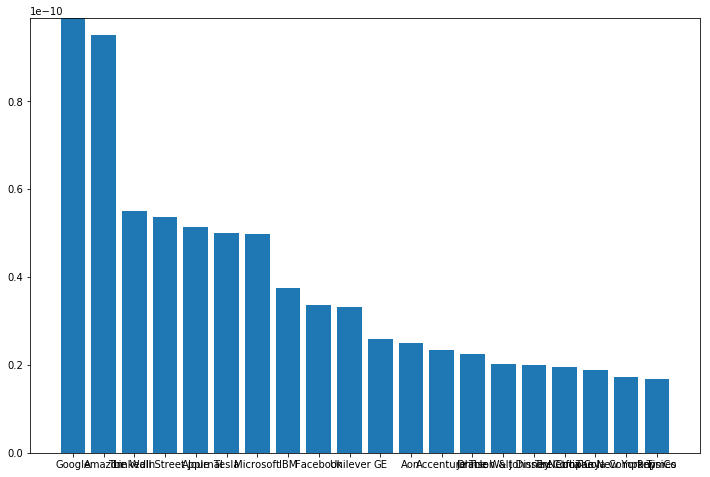

In [166]:
plt.figure(figsize=(12,8))
plt.bar(ChangeRank.index, ChangeRank.slope)
print(ChangeRank.index)

## Facebook

In [151]:
fb = pd.read_csv('temp_datalab_records_social_facebook.csv', usecols=['username', 'time', 'facebook_id', 'likes', 'talking_about_count'], parse_dates=True)

In [152]:
fb = fb[fb.time.str.contains('2018')]

In [154]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682208 entries, 2939183 to 3621390
Data columns (total 5 columns):
time                   682208 non-null object
username               663322 non-null object
likes                  682208 non-null int64
talking_about_count    682208 non-null int64
facebook_id            682208 non-null int64
dtypes: int64(3), object(2)
memory usage: 31.2+ MB


In [160]:
fb = fb[fb.username.notna()]

In [167]:
fb = fb.sort_values(['username', 'time'])

In [168]:
fb_company_list = fb.username.unique()

In [170]:
fb_likes_change = {}
for i in range(len(fb_company_list)):
    time = pd.to_datetime(fb[fb['username'] == fb_company_list[i]].time)
    likes = fb[fb['username'] == fb_company_list[i]].likes
    lr = LinearRegression()
    lr.fit(time.values.reshape(-1,1), likes.values)
    fb_likes_change[fb_company_list[i]] = lr.coef_
print(fb_likes_change)

{'1011News': array([3.83922918e-13]), '1019thewolf': array([2.69877507e-14]), '1027WGUS': array([4.64649124e-15]), '105.7WROR': array([5.37614675e-14]), '1079mixfm': array([2.94416876e-14]), '10best': array([2.24795094e-13]), '1800flowers': array([2.13269697e-12]), '1ShoppingCart': array([-1.15131677e-15]), '1st.Sec.Bank': array([2.2537228e-15]), '1stDetect': array([4.72650984e-16]), '1stFederalBank': array([1.24648408e-14]), '1stGuard': array([1.34364195e-15]), '1stSourceBank': array([3.87239205e-14]), '21Club': array([9.43320574e-15]), '23WIFR': array([2.94323416e-13]), '247Sports': array([7.16704736e-13]), '2u': array([3.3793548e-14]), '30AVacationRental': array([1.49322178e-14]), '360Blue30A': array([1.43973378e-14]), '365byWholeFoods': array([4.52458716e-13]), '3M': array([1.07897346e-11]), '3MCollision': array([8.64064185e-14]), '3MLittmann': array([5.44371386e-12]), '3dsystemscorp': array([3.62536885e-14]), '4EZGO': array([2.6073165e-13]), '4EurSole': array([-2.18590313e-14]), '

In [171]:
fb_talking_change = {}
for i in range(len(fb_company_list)):
    time = pd.to_datetime(fb[fb['username'] == fb_company_list[i]].time)
    talking = fb[fb['username'] == fb_company_list[i]].talking_about_count
    lr = LinearRegression()
    lr.fit(time.values.reshape(-1,1), talking.values)
    fb_talking_change[fb_company_list[i]] = lr.coef_
print(fb_talking_change)

{'1011News': array([-3.4673342e-13]), '1019thewolf': array([-4.94364976e-14]), '1027WGUS': array([-2.46299122e-16]), '105.7WROR': array([-3.44527774e-15]), '1079mixfm': array([-2.07617718e-13]), '10best': array([-7.21848967e-14]), '1800flowers': array([4.2574709e-13]), '1ShoppingCart': array([3.3543044e-17]), '1st.Sec.Bank': array([2.75623135e-15]), '1stDetect': array([-7.74306526e-17]), '1stFederalBank': array([6.52695102e-15]), '1stGuard': array([2.57338949e-17]), '1stSourceBank': array([3.25545112e-14]), '21Club': array([2.87148407e-14]), '23WIFR': array([5.89018001e-14]), '247Sports': array([-6.01662541e-12]), '2u': array([2.3215183e-14]), '30AVacationRental': array([-2.95556428e-16]), '360Blue30A': array([-1.05022795e-14]), '365byWholeFoods': array([-1.09568417e-14]), '3M': array([2.9703283e-13]), '3MCollision': array([2.43423883e-14]), '3MLittmann': array([7.36289383e-14]), '3dsystemscorp': array([2.72860309e-15]), '4EZGO': array([4.07277562e-14]), '4EurSole': array([-4.7301542e-

In [172]:
ChangeRank_fblikes = pd.DataFrame.from_dict(fb_likes_change, orient='index', columns=['slope']).sort_values('slope', ascending=False)
ChangeRank_fbtalking = pd.DataFrame.from_dict(fb_talking_change, orient='index', columns=['slope']).sort_values('slope', ascending=False)

Index(['netflix', 'AlibabaUS', 'facebook', 'Marvel', 'bookingcomUS',
       'KiplingUSA', 'bookingcom', 'KFC', 'MercadoLibre', 'McDonalds',
       'McDonaldsUS', 'NUKUSA', 'trivagoUS', 'Spotify', 'lightinthebox',
       'Dominos', 'nike', 'Groupon', 'delta', 'wayfair'],
      dtype='object')


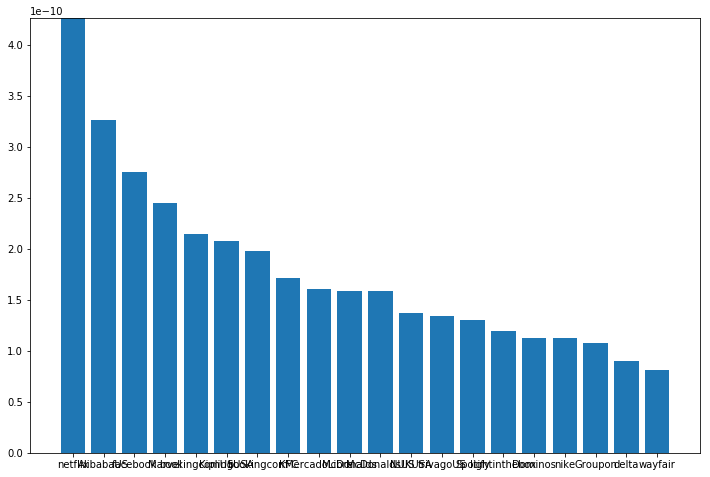

In [173]:
ChangeRank_fblikes = ChangeRank_fblikes.head(20)
plt.figure(figsize=(12,8))
plt.bar(ChangeRank_fblikes.index, ChangeRank_fblikes.slope)
print(ChangeRank_fblikes.index)

Index(['yahoo', 'CBSNews', 'usatoday', 'netflix', 'facebook', 'wwe', 'ESPN',
       'azcentral', 'nytimes', 'WTKR3', 'Oracle', 'thesun', 'CollegeHumor',
       'wreg3', 'cmlauncher', 'bookingcom', 'nike', 'tommyhilfiger',
       'MercadoLibre', 'gerdau'],
      dtype='object')


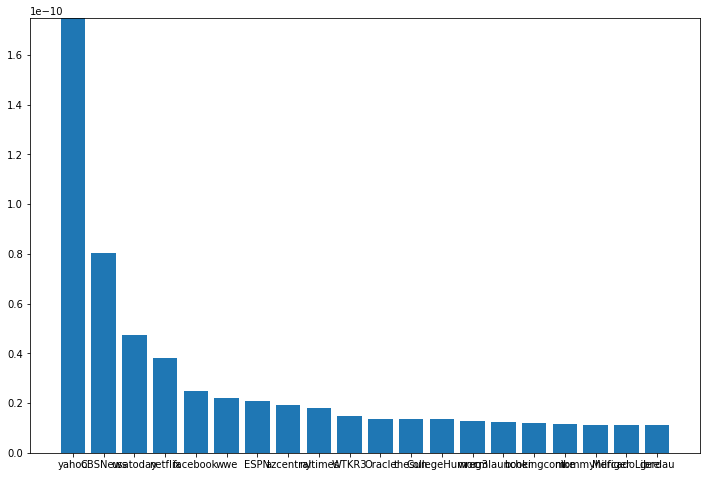

In [174]:
ChangeRank_fbtalking = ChangeRank_fbtalking.head(20)
plt.figure(figsize=(12,8))
plt.bar(ChangeRank_fbtalking.index, ChangeRank_fbtalking.slope)
print(ChangeRank_fbtalking.index)

In [179]:
AllCompanies = ChangeRank.index.append(ChangeRank_fblikes.index.append(ChangeRank_fbtalking.index))

In [184]:
AllCompanies.unique().sort_values()

Index(['Accenture', 'AlibabaUS', 'Amazon', 'Aon', 'Apple', 'CBSNews',
       'CollegeHumor', 'Dominos', 'ESPN', 'Facebook', 'GE', 'Google',
       'Groupon', 'IBM', 'Johnson & Johnson', 'KFC', 'KiplingUSA', 'LinkedIn',
       'Marvel', 'McDonalds', 'McDonaldsUS', 'MercadoLibre', 'Microsoft',
       'NUKUSA', 'Netflix', 'Oracle', 'PepsiCo', 'Spotify', 'Tesla',
       'The Coca-Cola Company', 'The New York Times',
       'The Wall Street Journal', 'The Walt Disney Company', 'Unilever',
       'WTKR3', 'azcentral', 'bookingcom', 'bookingcomUS', 'cmlauncher',
       'delta', 'facebook', 'gerdau', 'lightinthebox', 'netflix', 'nike',
       'nytimes', 'thesun', 'tommyhilfiger', 'trivagoUS', 'usatoday',
       'wayfair', 'wreg3', 'wwe', 'yahoo'],
      dtype='object')

In [213]:
ld_change = {k.lower().strip(): v for k, v in ld_change.items()}
fb_likes_change = {k.lower().strip(): v for k, v in fb_likes_change.items()}
fb_talking_change = {k.lower().strip(): v for k, v in fb_talking_change.items()}
selected_companies = [x.lower().strip() for x in AllCompanies.unique()]

{'professional diversity network': array([1.69698158e-14]),
 '1-800-flowers.com, inc.': array([4.88775692e-14]),
 '1800petmeds': array([7.7176569e-15]),
 '1st constitution bank': array([4.16410846e-15]),
 '1st security bank of washington': array([1.75620723e-14]),
 '1st source bank': array([1.83406014e-14]),
 '2020b llc': array([0.]),
 '21vianet group,inc.': array([0.]),
 '21st century fox': array([1.29747334e-13]),
 '3 phase line construction inc.': array([0.]),
 '3d material technologies, llc': array([4.35206137e-15]),
 '3d systems corporation': array([2.5086464e-13]),
 '3m': array([5.94656701e-12]),
 '3m electronic monitoring ltd.': array([0.]),
 '40|86 advisors': array([1.14409399e-14]),
 '51job': array([0.]),
 '58.com inc': array([3.26950176e-14]),
 '8x8': array([1.50766385e-13]),
 '99': array([1.96348845e-14]),
 'a. h. belo': array([4.25491999e-15]),
 'a. o. smith corporation': array([3.06118257e-13]),
 'a. schulman, inc.': array([1.2995164e-13]),
 'a.j. oster, llc': array([2.846

In [219]:
AllCompaniesDF = pd.DataFrame(index = selected_companies, columns=['LD_follower_change', 'FB_likes_change', 'FB_talking_change'])
for com in selected_companies:
    if com in ld_change.keys():
        AllCompaniesDF.loc[com, 'LD_follower_change'] = ld_change[com][0]
    if com in fb_likes_change.keys():
        AllCompaniesDF.loc[com, 'FB_likes_change'] = fb_likes_change[com][0]
    if com in fb_talking_change.keys():
        AllCompaniesDF.loc[com, 'FB_talking_change'] = fb_talking_change[com][0]

In [220]:
AllCompaniesDF

,LD_follower_change,FB_likes_change,FB_talking_change
google,9.89879e-11,6.15209e-11,-2.14633e-12
amazon,9.50134e-11,2.52089e-11,-4.73006e-12
linkedin,5.49847e-11,8.51095e-12,1.60196e-12
the wall street journal,5.36838e-11,NaN,NaN
apple,5.13376e-11,NaN,NaN
tesla,4.99817e-11,3.34165e-11,-9.05671e-13
microsoft,4.97765e-11,6.34667e-11,3.54756e-12
ibm,3.76209e-11,1.71553e-12,1.60036e-12
facebook,3.37474e-11,2.75482e-10,2.47724e-11
unilever,3.31134e-11,4.04505e-12,1.4242e-12


In [221]:
AllCompaniesDF.loc['mcdonalds', 'LD_follower_change'] = (AllCompaniesDF.loc['mcdonalds', 'LD_follower_change'] + AllCompaniesDF.loc['mcdonaldsus', 'LD_follower_change']) / 2
AllCompaniesDF.loc['mcdonalds', 'FB_likes_change'] = (AllCompaniesDF.loc['mcdonalds', 'FB_likes_change'] + AllCompaniesDF.loc['mcdonaldsus', 'FB_likes_change']) / 2
AllCompaniesDF.loc['mcdonalds', 'FB_talking_change'] = (AllCompaniesDF.loc['mcdonalds', 'FB_talking_change'] + AllCompaniesDF.loc['mcdonaldsus', 'FB_talking_change']) / 2
AllCompaniesDF.loc['bookingcom', 'LD_follower_change'] = (AllCompaniesDF.loc['bookingcom', 'LD_follower_change'] + AllCompaniesDF.loc['bookingcomus', 'LD_follower_change']) / 2
AllCompaniesDF.loc['bookingcom', 'FB_likes_change'] = (AllCompaniesDF.loc['bookingcom', 'FB_likes_change'] + AllCompaniesDF.loc['bookingcomus', 'FB_likes_change']) / 2
AllCompaniesDF.loc['bookingcom', 'FB_talking_change'] = (AllCompaniesDF.loc['bookingcom', 'FB_talking_change'] + AllCompaniesDF.loc['bookingcomus', 'FB_talking_change']) / 2

In [222]:
AllCompaniesDF = AllCompaniesDF.drop(['mcdonaldsus', 'bookingcomus'])

In [252]:
AllCompaniesDF = AllCompaniesDF.fillna(0).fillna(0).sort_values(['LD_follower_change', 'FB_likes_change', 'FB_talking_change'], ascending=False)
AllCompaniesDF

,LD_follower_change,FB_likes_change,FB_talking_change
Companies,,,
google,9.898791e-11,6.152094e-11,-2.146335e-12
amazon,9.501344e-11,2.520893e-11,-4.730058e-12
linkedin,5.498470e-11,8.510947e-12,1.601957e-12
the wall street journal,5.368377e-11,0.000000e+00,0.000000e+00
apple,5.133764e-11,0.000000e+00,0.000000e+00
tesla,4.998174e-11,3.341655e-11,-9.056714e-13
microsoft,4.977649e-11,6.346665e-11,3.547565e-12
ibm,3.762089e-11,1.715534e-12,1.600361e-12
facebook,3.374741e-11,2.754825e-10,2.477242e-11


In [256]:
AllCompaniesDF.groupby('Companies').mean().reset_index().set_index('Companies')

,LD_follower_change,FB_likes_change,FB_talking_change
Companies,,,
accenture,2.334027e-11,3.527241e-12,1.655134e-14
alibabaus,0.000000e+00,3.258996e-10,9.987225e-12
amazon,9.501344e-11,2.520893e-11,-4.730058e-12
aon,2.500044e-11,0.000000e+00,0.000000e+00
apple,5.133764e-11,0.000000e+00,0.000000e+00
azcentral,0.000000e+00,5.922205e-12,1.924435e-11
bookingcom,0.000000e+00,2.059758e-10,5.258535e-12
cbsnews,0.000000e+00,1.990196e-11,8.031221e-11
cmlauncher,0.000000e+00,2.052240e-11,1.224559e-11


In [265]:
AllCompaniesDF.sort_values(['FB_likes_change', 'LD_follower_change', 'FB_talking_change'], ascending=False)
# AllCompaniesDF.to_csv('AllCompanies.csv')

,LD_follower_change,FB_likes_change,FB_talking_change
Companies,,,
netflix,1.946568e-11,4.262644e-10,3.814149e-11
netflix,1.946568e-11,4.262644e-10,3.814149e-11
alibabaus,0.000000e+00,3.258996e-10,9.987225e-12
facebook,3.374741e-11,2.754825e-10,2.477242e-11
facebook,3.374741e-11,2.754825e-10,2.477242e-11
marvel,0.000000e+00,2.451791e-10,-1.573186e-12
kiplingusa,0.000000e+00,2.074271e-10,-4.607730e-14
bookingcom,0.000000e+00,2.059758e-10,5.258535e-12
kfc,0.000000e+00,1.717932e-10,-7.172694e-13


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

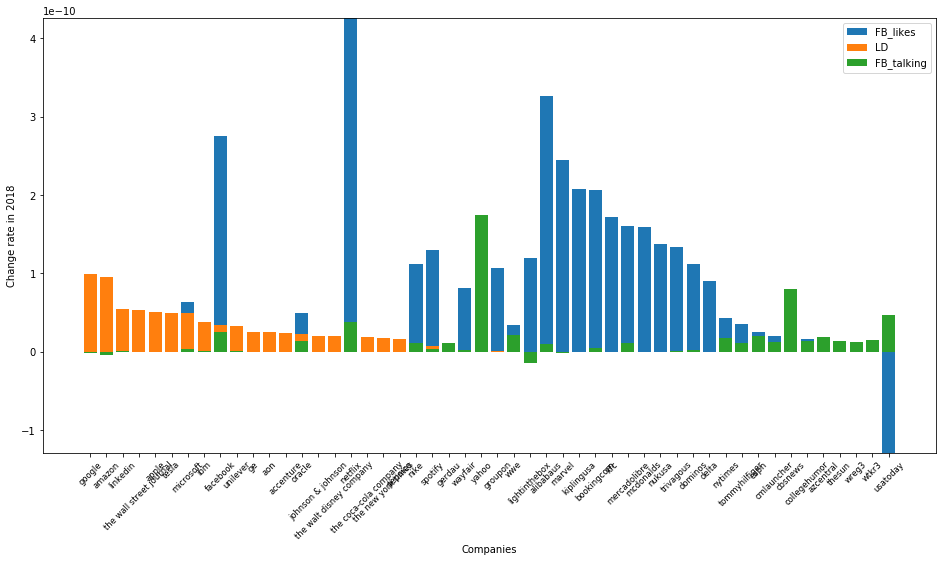

In [327]:
plt.figure(figsize=(16, 8))
ind = AllCompaniesDF.index
p1 = plt.bar(ind, AllCompaniesDF.FB_likes_change, label='FB_likes')
p2 = plt.bar(ind, AllCompaniesDF.LD_follower_change, label='LD')
p3 = plt.bar(ind, AllCompaniesDF.FB_talking_change, label='FB_talking')
plt.legend()
plt.xlabel('Companies')
plt.ylabel('Change rate in 2018')
plt.xticks(rotation=45, fontsize='small')

## NYSE job data (cleaned)

In [266]:
jb = pd.read_csv('job_truncated.csv')

In [283]:
for i in [x.lower() for x in jb.brand.unique()]:
    for j in selected_companies:
        if j != 'ge':
            if j in i:
                print(i, '>>possibly be>>', j)

amazon >>possibly be>> amazon
025 - delta division >>possibly be>> delta
425 - delta logistics >>possibly be>> delta
aon corporation >>possibly be>> aon
google >>possibly be>> google
google fiber >>possibly be>> google
amazon dev centre italy srl >>possibly be>> amazon
amazon uk services ltd. >>possibly be>> amazon
amazon.com services, inc. >>possibly be>> amazon
amazon hk service company  ltd >>possibly be>> amazon
amazon dev center india - hyd >>possibly be>> amazon
amazon retail llc >>possibly be>> amazon
amazon japan g.k. >>possibly be>> amazon
amazon web services, inc. >>possibly be>> amazon
amazon capital services, inc. >>possibly be>> amazon
amazon eu sarl >>possibly be>> amazon
amazon services llc >>possibly be>> amazon
amazon eu sarl(germany branch) >>possibly be>> amazon
amazon eu sarl (italy branch) >>possibly be>> amazon
amazon cs ireland limited >>possibly be>> amazon
amazon vcc gmbh >>possibly be>> amazon
amazon.com.kydc llc >>possibly be>> amazon
amazon fulfillment polan

### clean NYSE data with amazon, aon, google, delta, 

In [308]:
jb_index = dict()
for i in [x.lower() for x in jb.brand.unique()]:
    if i in selected_companies:
        jb_index[i] = i
for i in [x.lower() for x in jb.brand.unique()]:
    for j in selected_companies:
        if j not in ['ge', 'apple', 'delta']:
            if j in i:
                jb_index[i] = j
jb_index

{'amazon': 'amazon',
 'google': 'google',
 'delta': 'delta',
 'aon corporation': 'aon',
 'google fiber': 'google',
 'amazon dev centre italy srl': 'amazon',
 'amazon uk services ltd.': 'amazon',
 'amazon.com services, inc.': 'amazon',
 'amazon hk service company  ltd': 'amazon',
 'amazon dev center india - hyd': 'amazon',
 'amazon retail llc': 'amazon',
 'amazon japan g.k.': 'amazon',
 'amazon web services, inc.': 'amazon',
 'amazon capital services, inc.': 'amazon',
 'amazon eu sarl': 'amazon',
 'amazon services llc': 'amazon',
 'amazon eu sarl(germany branch)': 'amazon',
 'amazon eu sarl (italy branch)': 'amazon',
 'amazon cs ireland limited': 'amazon',
 'amazon vcc gmbh': 'amazon',
 'amazon.com.kydc llc': 'amazon',
 'amazon fulfillment poland sp.': 'amazon',
 'amazon web services uk limited': 'amazon',
 'amazon.com.indc llc': 'amazon',
 'amazon corporate llc': 'amazon',
 'amazon italia logistica s.r.l.': 'amazon',
 'amazon development center deu': 'amazon',
 'amazon media eu s.a.r.l

In [309]:
jb.brand = jb.brand.apply(lambda x: x.lower()).replace(jb_index)

In [315]:
job_count = jb[jb.brand.isin(jb_index.values())].groupby('brand').count()

In [316]:
# job_count.to_csv('job_count.csv')

In [317]:
job_count

,Unnamed: 0,locality,region,date_updated
brand,,,,
amazon,544635,544635,544635,0
aon,34485,34485,34485,0
delta,18,18,18,0
google,195426,195426,195426,0
yahoo,14,14,14,0


In [352]:
Alldf = AllCompaniesDF[AllCompaniesDF.index.isin(job_count.index)]

In [353]:
Alldf['job_count'] = job_count.locality

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
Alldf

,LD_follower_change,FB_likes_change,FB_talking_change,job_count
Companies,,,,
google,9.898791e-11,6.152094e-11,-2.146335e-12,195426
amazon,9.501344e-11,2.520893e-11,-4.730058e-12,544635
aon,2.500044e-11,0.000000e+00,0.000000e+00,34485
yahoo,1.143159e-12,4.453600e-11,1.748325e-10,14
delta,0.000000e+00,9.033607e-11,-4.122748e-13,18


## Revenue of the companies (www.statista.com)

In [355]:
revenue = {'google': (136.22-110.38)/110.38, 'amazon':1.226, 'aon':0.772, 'yahoo': (1.33-1.37)/1.37, 'delta':0.802}
Alldf['Revenue_change'] = revenue.values()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [356]:
# Alldf.to_csv('Final.csv')

In [370]:
Alldf

,LD_follower_change,FB_likes_change,FB_talking_change,job_count,Revenue_change
Companies,,,,,
google,9.898791e-11,6.152094e-11,-2.146335e-12,195426,0.234100
amazon,9.501344e-11,2.520893e-11,-4.730058e-12,544635,1.226000
aon,2.500044e-11,0.000000e+00,0.000000e+00,34485,0.772000
yahoo,1.143159e-12,4.453600e-11,1.748325e-10,14,-0.029197
delta,0.000000e+00,9.033607e-11,-4.122748e-13,18,0.802000


[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] 
 [1.0, 0.681022941411224, 0.014388982346265802, 0.35880364510365925, 0.2097658327363539, 1.0]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Text(-5.04, 0.85, 'Delta')

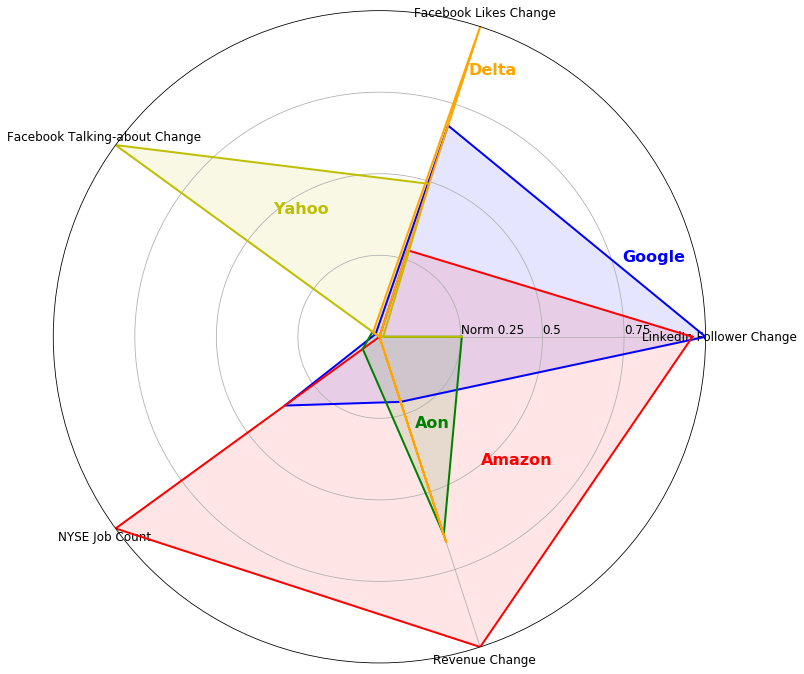

In [441]:
from sklearn.preprocessing import MinMaxScaler
from math import pi
scaler = MinMaxScaler()

# Set data
df = pd.DataFrame({
'group': Alldf.index.tolist(),
'LinkedIn Follower Change': scaler.fit_transform(Alldf['LD_follower_change'].values.reshape(-1,1)).flatten(),
'Facebook Likes Change': scaler.fit_transform(Alldf['FB_likes_change'].values.reshape(-1,1)).flatten(),
'Facebook Talking-about Change': scaler.fit_transform(Alldf['FB_talking_change'].values.reshape(-1,1)).flatten(),
'NYSE Job Count': scaler.fit_transform(Alldf['job_count'].values.reshape(-1,1)).flatten(),
'Revenue Change': scaler.fit_transform(Alldf['Revenue_change'].values.reshape(-1,1)).flatten()
})

# number of variable
categories=list(df)[1:]
N = len(categories)
 
# Google
values=df.iloc[0,:].drop('group').values.flatten().tolist()
values += values[:1]
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,  color='k', size=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["Norm 0.25","0.5","0.75"], color="k", size=12)
plt.ylim(0,1)

print(angles,'\n',values)
# Plot data
ax.plot(angles, values, linewidth=2, color='b', linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


# Amazon
values2=df.iloc[1,:].drop('group').values.flatten().tolist()
values2 += values2[:1]
ax.plot(angles, values2, linewidth=2, color='r', linestyle='solid')
ax.fill(angles, values2, 'r', alpha=0.1)

# Aon
values3=df.iloc[2,:].drop('group').values.flatten().tolist()
values3 += values3[:1]
ax.plot(angles, values3, linewidth=2, color='g', linestyle='solid')
ax.fill(angles, values3, 'g', alpha=0.1)

# Yahoo
values4=df.iloc[3,:].drop('group').values.flatten().tolist()
values4 += values3[:1]
ax.plot(angles, values4, linewidth=2, color='y', linestyle='solid')
ax.fill(angles, values4, 'y', alpha=0.1)

# Delta
values5=df.iloc[4,:].drop('group').values.flatten().tolist()
values5 += values5[:1]
ax.plot(angles, values5, linewidth=2, color='orange', linestyle='solid')
ax.fill(angles, values5, 'orange', alpha=0.1)

plt.text(0.3, 0.78, 'Google', color='b', size=16, weight='extra bold')
plt.text(-0.9, 0.5, 'Amazon', color='r', size=16, weight='extra bold')
plt.text(-1.2, 0.3, 'Aon', color='g', size=16, weight='extra bold')
plt.text(-4, 0.5, 'Yahoo', color='y', size=16, weight='extra bold')
plt.text(-5.04, 0.85, 'Delta', color='orange', size=16, weight='extra bold')